In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [2]:
df = pd.read_csv("/content/medicine_quality_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Active Ingredient              1044 non-null   object 
 1   Days Until Expiry              1042 non-null   float64
 2   Storage Temperature (°C)       1042 non-null   float64
 3   Warning Labels Present         1036 non-null   float64
 4   Dissolution Rate (%)           1029 non-null   float64
 5   Disintegration Time (minutes)  1043 non-null   float64
 6   Impurity Level (%)             1041 non-null   float64
 7   Assay Purity (%)               1040 non-null   float64
 8   Safe/Not Safe                  1100 non-null   object 
dtypes: float64(7), object(2)
memory usage: 77.5+ KB


In [4]:
df.head()

,Active Ingredient,Days Until Expiry,Storage Temperature (°C),Warning Labels Present,Dissolution Rate (%),Disintegration Time (minutes),Impurity Level (%),Assay Purity (%),Safe/Not Safe
0,Aspirin,806.0,22.204401,1.0,92.186912,13.151429,0.187995,104.476169,Safe
1,Aspirin,NaN,15.105437,0.0,98.913578,20.429400,0.383462,91.517530,Not Safe
2,Paracetamol,212.0,29.736452,1.0,89.231262,17.935248,0.147969,99.981803,Safe
3,Aspirin,197.0,21.905620,1.0,96.122301,17.346834,0.412723,93.251655,Not Safe
4,Aspirin,480.0,23.195201,0.0,90.541369,16.868827,0.284688,100.511049,Safe


In [5]:
df.describe()

,Days Until Expiry,Storage Temperature (°C),Warning Labels Present,Dissolution Rate (%),Disintegration Time (minutes),Impurity Level (%),Assay Purity (%)
count,1042.000000,1042.000000,1036.000000,1029.000000,1043.000000,1041.000000,1040.000000
mean,521.574856,22.369286,0.493243,90.877363,15.118175,0.216508,99.655988
std,269.891010,4.281929,0.500196,5.472687,8.259523,0.130667,5.018053
min,30.000000,15.005875,0.000000,80.019866,1.032743,0.011296,90.166727
25%,309.000000,18.933261,0.000000,86.686901,7.718888,0.108131,95.714673
50%,532.000000,22.296507,0.000000,91.170048,15.594086,0.198620,99.989197
75%,748.000000,25.882905,1.000000,95.612009,21.442987,0.309459,103.220751
max,999.000000,29.941291,1.000000,99.988889,29.984781,0.498103,109.905037


In [6]:
df.isnull()

,Active Ingredient,Days Until Expiry,Storage Temperature (°C),Warning Labels Present,Dissolution Rate (%),Disintegration Time (minutes),Impurity Level (%),Assay Purity (%),Safe/Not Safe
0,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1095,False,False,False,False,False,False,True,False,False
1096,False,False,False,False,False,False,False,False,False
1097,False,True,False,False,False,False,False,False,False
1098,True,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

,0
Active Ingredient,56
Days Until Expiry,58
Storage Temperature (°C),58
Warning Labels Present,64
Dissolution Rate (%),71
Disintegration Time (minutes),57
Impurity Level (%),59
Assay Purity (%),60
Safe/Not Safe,0


In [8]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
binary_features = [col for col in numerical_features if df[col].dropna().isin([0,1]).all()]

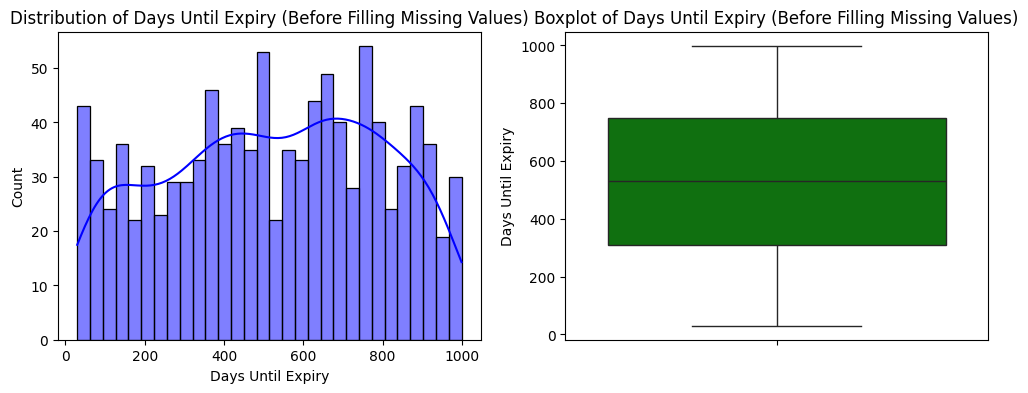

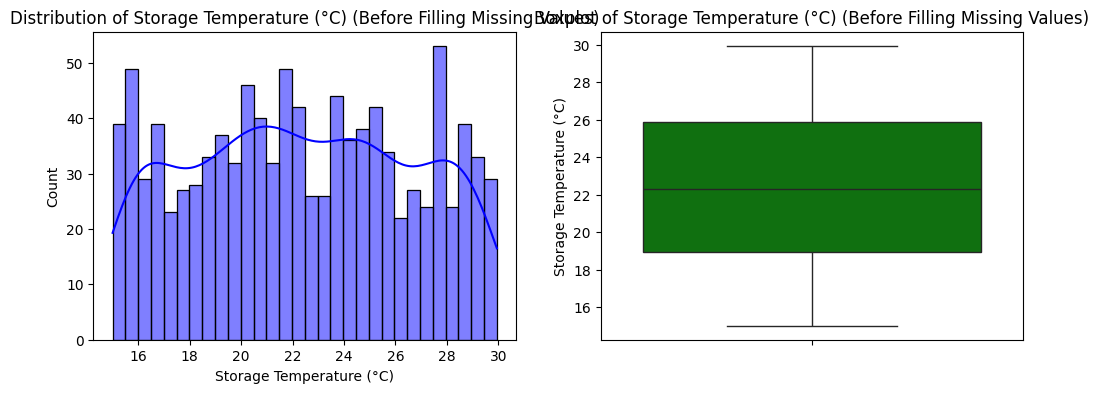

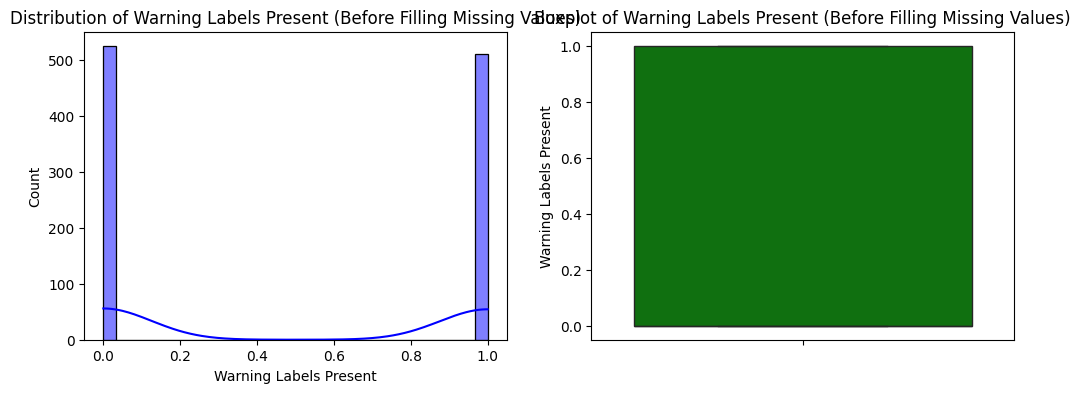

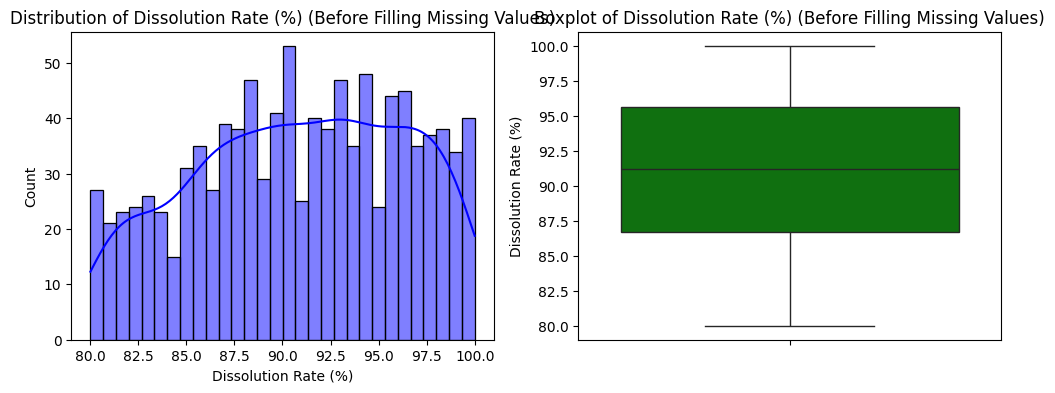

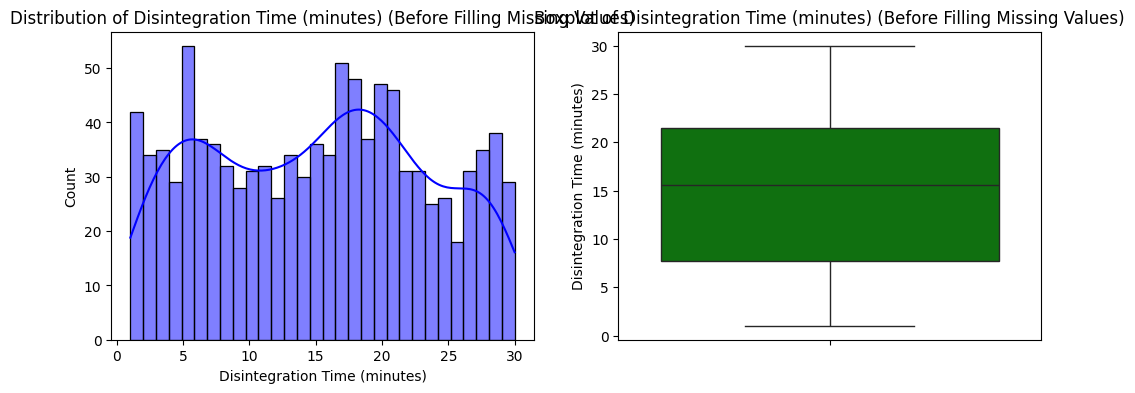

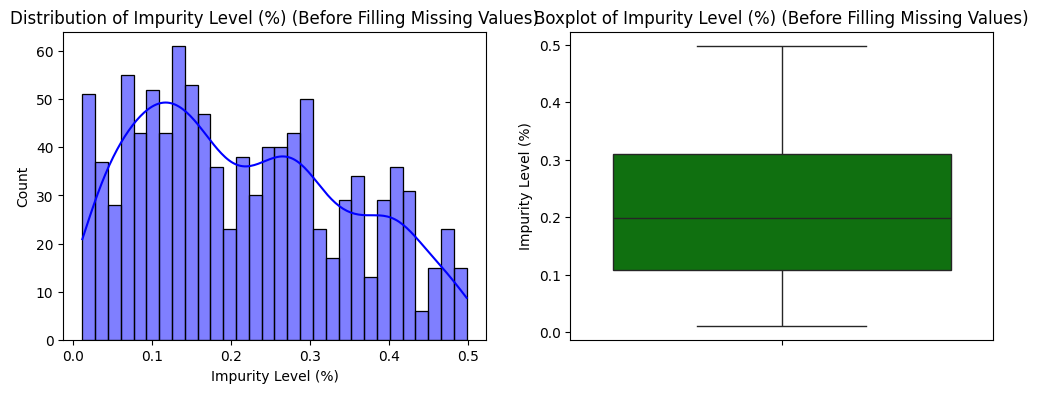

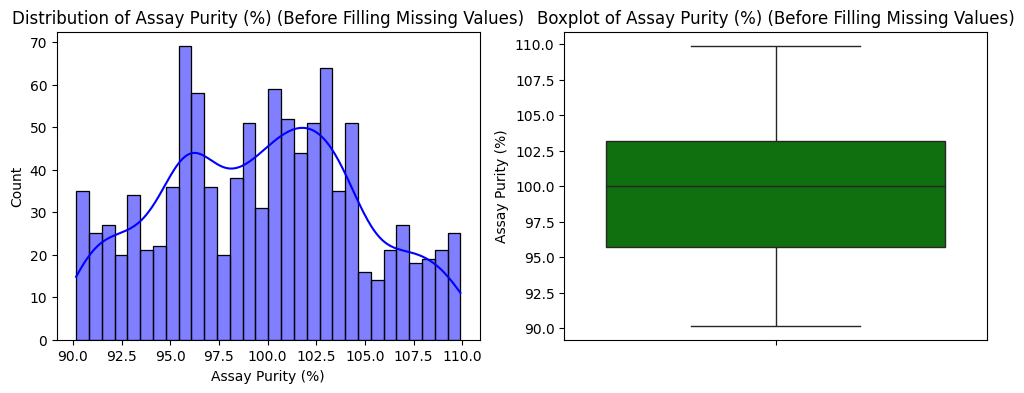

In [9]:
for feature in numerical_features:
    if df[feature].isnull().sum() > 0:
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature].dropna(), kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {feature} (Before Filling Missing Values)')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[feature], color='green')
        plt.title(f'Boxplot of {feature} (Before Filling Missing Values)')

        plt.show()

In [10]:
for feature in numerical_features:
    if df[feature].isnull().sum() > 0 and feature not in binary_features:
        skewness = df[feature].skew()

        if abs(skewness) < 0.5:  # Low skewness → Normal distribution
            print(f'{feature} Skewness : {abs(skewness)}')
            df[feature].fillna(df[feature].mean(), inplace=True)
            print(f'{feature} filled with Mean (Normal Distribution)\n')

        else:  # High skewness
            print(f'{feature} Skewness : {abs(skewness)}')
            df[feature].fillna(df[feature].median(), inplace=True)
            print(f'{feature} filled with Median (Skewed Distribution)\n')

Days Until Expiry Skewness : 0.11500597731166681
Days Until Expiry filled with Mean (Normal Distribution)

Storage Temperature (°C) Skewness : 0.010471372984591063
Storage Temperature (°C) filled with Mean (Normal Distribution)

Dissolution Rate (%) Skewness : 0.18106024139892737
Dissolution Rate (%) filled with Mean (Normal Distribution)

Disintegration Time (minutes) Skewness : 0.019219383607697222
Disintegration Time (minutes) filled with Mean (Normal Distribution)

Impurity Level (%) Skewness : 0.3397194474744957
Impurity Level (%) filled with Mean (Normal Distribution)

Assay Purity (%) Skewness : 0.03967508340694656
Assay Purity (%) filled with Mean (Normal Distribution)



<ipython-input-10-2062fd7fda76>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mean(), inplace=True)


In [11]:
if "Days Until Expiry" in df.columns:
    df["Days Until Expiry"].fillna(round(df["Days Until Expiry"].median()), inplace=True)
    df["Days Until Expiry"] = df["Days Until Expiry"].astype(int)
    print(f'"Days Until Expiry" filled with rounded Median and converted to Integer')

"Days Until Expiry" filled with rounded Median and converted to Integer


<ipython-input-11-36f037c61b1e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Days Until Expiry"].fillna(round(df["Days Until Expiry"].median()), inplace=True)


In [12]:
for feature in binary_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)
    print(f'{feature} filled with Mode (Binary Feature)')

Warning Labels Present filled with Mode (Binary Feature)


<ipython-input-12-0b275df2c628>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mode()[0], inplace=True)


In [13]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    if df[feature].isnull().sum() > 0:
        df[feature].fillna(df[feature].mode()[0], inplace=True)
        print(f'{feature} filled with Mode (Categorical Data)')

Active Ingredient filled with Mode (Categorical Data)


<ipython-input-13-cfd4c2e4e334>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mode()[0], inplace=True)


In [14]:
print("\nMissing Values After Filling:\n", df.isnull().sum())


Missing Values After Filling:
 Active Ingredient                0
Days Until Expiry                0
Storage Temperature (°C)         0
Warning Labels Present           0
Dissolution Rate (%)             0
Disintegration Time (minutes)    0
Impurity Level (%)               0
Assay Purity (%)                 0
Safe/Not Safe                    0
dtype: int64


In [15]:
df.to_csv("Final_medicine_quality_dataset.csv", index=False)
print("\nCleaned dataset saved as 'Final_medicine_quality_dataset.csv'")


Cleaned dataset saved as 'Final_medicine_quality_dataset.csv'
